In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

In [151]:
df = pd.read_csv("albana_abril.csv")

In [152]:
# Remover renglones sin valores 
df = df[df.Age != "Unknown"]

In [153]:
# Crear grupos por campana 
df_campaign_groups = df.groupby("Campaign name")

df_campaign_groups = list(df_campaign_groups)

# Data Frame de campana Awareness
df_awareness = df_campaign_groups[0][1]

# Data Frame de campana Traffic
df_traffic = df_campaign_groups[1][1]

In [154]:
df_awareness.head()

,Reporting starts,Reporting ends,Campaign name,Age,Campaign Delivery,Ad set budget,Ad set budget type,Attribution setting,Results,Result indicator,Reach,Impressions,Cost per results,Amount spent (MXN),Ends,Estimated ad recall lift rate,Frequency,Unique link clicks,Website purchases,Result rate
1,4/23/2022,4/23/2022,Abril_Awareness_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,40.0,estimated_ad_recallers,713,771,0.154250,6.17,4/23/2022,5.610098,1.081346,NaN,NaN,5.188067
2,4/23/2022,4/23/2022,Abril_Awareness_35+,35-44,recently_completed,Using ad set budget,0,7-day click or 1-day view,90.0,estimated_ad_recallers,1913,2006,0.171667,15.45,4/23/2022,4.704652,1.048615,3.0,NaN,4.486540
6,4/22/2022,4/22/2022,Abril_Awareness_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,120.0,estimated_ad_recallers,1784,1955,0.125167,15.02,4/23/2022,6.726457,1.095852,6.0,NaN,6.138107
7,4/22/2022,4/22/2022,Abril_Awareness_35+,35-44,recently_completed,Using ad set budget,0,7-day click or 1-day view,250.0,estimated_ad_recallers,4378,4729,0.137560,34.39,4/23/2022,5.710370,1.080174,3.0,NaN,5.286530
12,4/21/2022,4/21/2022,Abril_Awareness_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,110.0,estimated_ad_recallers,1792,1966,0.143909,15.83,4/23/2022,6.138393,1.097098,1.0,NaN,5.595117


Index(['Reporting starts', 'Reporting ends', 'Campaign name', 'Age',
       'Campaign Delivery', 'Ad set budget', 'Ad set budget type',
       'Attribution setting', 'Results', 'Result indicator', 'Reach',
       'Impressions', 'Cost per results', 'Amount spent (MXN)', 'Ends',
       'Estimated ad recall lift rate', 'Frequency', 'Unique link clicks',
       'Website purchases', 'Result rate'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

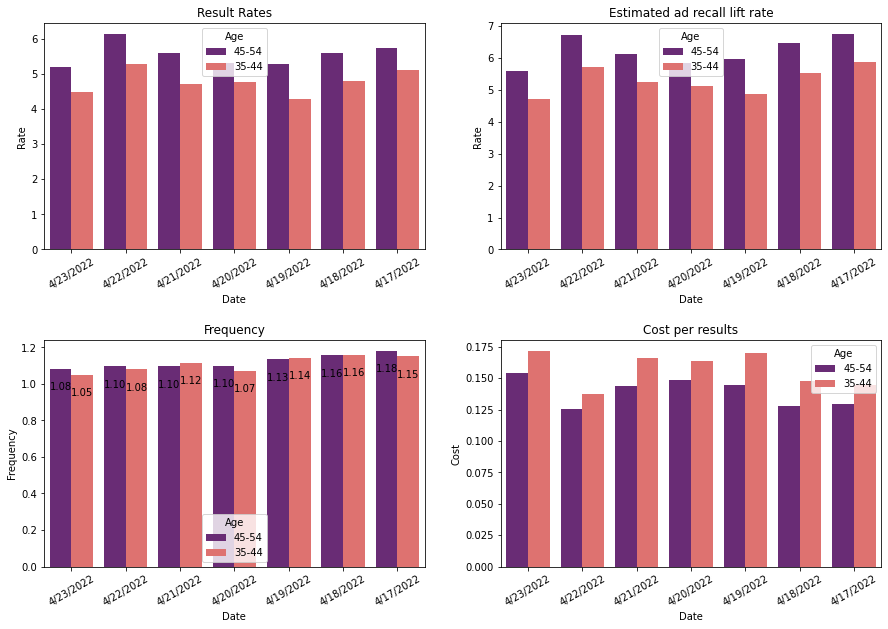

Frecuencia (35-44):  1.110177857142857
Frecuencia (45-54):  1.1205342857142857
Audiencia (35-44):  27637
Audiencia (45-54):  11617
Ad Recall Lift Total Sum (35-44):  5.301310285714286
Ad Recall Lift Total Sum (45-54):  6.2186142857142865
Cost per result sum (35-44):  0.15716748314285714
Cost per result sum (45-54):  0.13904392285714287


In [155]:
# Tengo dos edades que son 45-54 & 35-44
# Analitica completa de todos en comparativa
plt.clf()
fig, axes = plt.subplots(2, 2, figsize = (15, 10)) 

print(df_awareness.columns)

ax1 = sns.barplot(data = df_awareness, x = "Reporting starts", y = "Result rate", hue = "Age", ax = axes[0][0], palette = "magma")
ax1.set_xticklabels(df_awareness["Reporting starts"].unique(), rotation = 30)
ax1.set_xlabel("Date")
ax1.set_ylabel("Rate")
ax1.set_title("Result Rates")

ax2 = sns.barplot(data = df_awareness, x = "Reporting starts", y = "Estimated ad recall lift rate", hue = "Age", ax = axes[0][1], palette = "magma")
ax2.set_xticklabels(df_awareness["Reporting starts"].unique(), rotation = 30)
ax2.set_xlabel("Date")
ax2.set_ylabel("Rate")
ax2.set_title("Estimated ad recall lift rate")

ax3 = sns.barplot(data = df_awareness, x = "Reporting starts", y = "Frequency", hue = "Age", ax = axes[1][0], palette = "magma", estimator = np.sum)
ax3.set_xticklabels(df_awareness["Reporting starts"].unique(), rotation = 30)
ax3.set_xlabel("Date")
ax3.set_title("Frequency")

# Pintar valores para ver diferencia de frecuencia
for value in ax3.patches:
    ax3.annotate(format(value.get_height(), ".2f"), [value.get_x() + value.get_width() / 2, value.get_height() - .1], ha = "center", va = "center")

ax4 = sns.barplot(data = df_awareness, x = "Reporting starts", y = "Cost per results", hue = "Age", palette = "magma")
ax4.set_xticklabels(df_awareness["Reporting starts"].unique(), rotation = 30)
ax4.set_xlabel("Date")
ax4.set_ylabel("Cost")
ax4.set_title("Cost per results")

plt.subplots_adjust(hspace = 0.4)
plt.show()

# Diferencia de promedios frecuencia 
young = df_awareness[df_awareness.Age == "35-44"]["Frequency"]
print("Frecuencia (35-44): ", young.sum() / len(young))

old = df_awareness[df_awareness.Age == "45-54"]["Frequency"]
print("Frecuencia (45-54): ", old.sum() / len(old))

# Tamano de audiencia 
young_audience = df_awareness[df_awareness.Age == "35-44"]["Reach"].sum()
print("Audiencia (35-44): ", young_audience)

old_audience = df_awareness[df_awareness.Age == "45-54"]["Reach"].sum()
print("Audiencia (45-54): ", old_audience)

young_ad_recall = df_awareness[df_awareness.Age == "35-44"]["Estimated ad recall lift rate"].sum()
print("Ad Recall Lift Total Sum (35-44): ", young_ad_recall / len(df_awareness[df_awareness.Age == "35-44"]["Estimated ad recall lift rate"]))

old_ad_recall = df_awareness[df_awareness.Age == "45-54"]["Estimated ad recall lift rate"].sum()
print("Ad Recall Lift Total Sum (45-54): ", old_ad_recall / len(df_awareness[df_awareness.Age == "45-54"]["Estimated ad recall lift rate"]))

young_cost_per_result = df_awareness[df_awareness.Age == "35-44"]["Cost per results"].sum()
print("Cost per result sum (35-44): ", young_cost_per_result / len(df_awareness[df_awareness.Age == "35-44"]["Cost per results"]))

old_cost_per_result = df_awareness[df_awareness.Age == "45-54"]["Cost per results"].sum()
print("Cost per result sum (45-54): ", old_cost_per_result / len(df_awareness[df_awareness.Age == "45-54"]["Cost per results"]))


In [156]:
df_traffic.head()

,Reporting starts,Reporting ends,Campaign name,Age,Campaign Delivery,Ad set budget,Ad set budget type,Attribution setting,Results,Result indicator,Reach,Impressions,Cost per results,Amount spent (MXN),Ends,Estimated ad recall lift rate,Frequency,Unique link clicks,Website purchases,Result rate
3,4/23/2022,4/23/2022,Abril_Maddy_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,2.0,actions:link_click,467,476,4.635000,9.27,4/23/2022,0.0,1.019272,2.0,NaN,0.420168
4,4/23/2022,4/23/2022,Abril_Maddy_35+,35-44,recently_completed,Using ad set budget,0,7-day click or 1-day view,NaN,NaN,644,661,NaN,10.68,4/23/2022,0.0,1.026398,NaN,NaN,NaN
9,4/22/2022,4/22/2022,Abril_Maddy_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,5.0,actions:link_click,695,831,5.252000,26.26,4/23/2022,0.0,1.195683,5.0,NaN,0.601685
10,4/22/2022,4/22/2022,Abril_Maddy_35+,35-44,recently_completed,Using ad set budget,0,7-day click or 1-day view,9.0,actions:link_click,809,1002,2.816667,25.35,4/23/2022,0.0,1.238566,8.0,NaN,0.898204
15,4/21/2022,4/21/2022,Abril_Maddy_35+,45-54,recently_completed,Using ad set budget,0,7-day click or 1-day view,6.0,actions:link_click,1032,1110,4.198333,25.19,4/23/2022,0.0,1.075581,6.0,NaN,0.540541


c:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


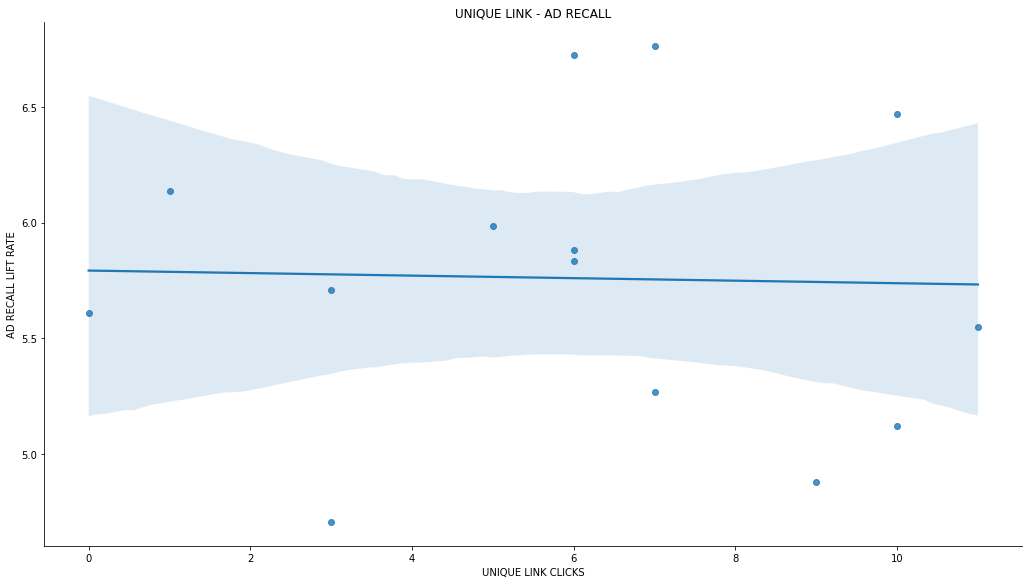

El cof. de correlacion entre Unique Link Clicks - Estimated ad recall lift rate es:  -0.028975071610921124


In [157]:
# DataFrame solo con valores de fecha, tasa de recuerdo y clicks unicos
df_link_recall = df_awareness[["Reporting starts", "Estimated ad recall lift rate", "Unique link clicks"]]

df_link_recall["Unique link clicks"].fillna(0,inplace = True)

sns.lmplot(data = df_link_recall, y = "Estimated ad recall lift rate", x = "Unique link clicks", height= 8, aspect = 1.8)
plt.xlabel("UNIQUE LINK CLICKS")
plt.ylabel("AD RECALL LIFT RATE")
plt.title("UNIQUE LINK - AD RECALL")

plt.show()

corr, _ = pearsonr(df_link_recall["Unique link clicks"], df_link_recall["Estimated ad recall lift rate"])
print("El cof. de correlacion entre Unique Link Clicks - Estimated ad recall lift rate es: ", corr)

Resultados Finales Campana

In [158]:
df_may = pd.read_csv("albana_ad-Ads-May-1-2022-May-10-2022.csv")

In [159]:
df_may_group = df_may.groupby("Ad name")

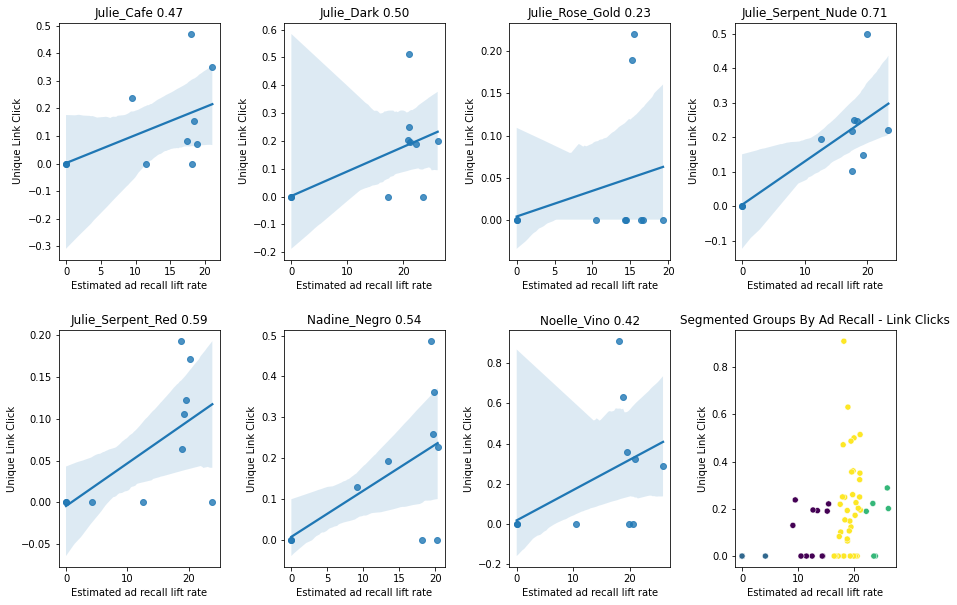

Corr Total:  0.4624867281444987
Muestra una correlacion debil positiva


In [160]:
# Mostrar correlacion de cada producto (ad recall lift - link clicks)
fig, axes = plt.subplots(2, 4, figsize = (15, 10))

i = 0
j = 0

total_corr = 0
cont = 0

for name, df_temp in df_may_group:
    corr, _ = pearsonr(df_temp["Estimated ad recall lift rate"], df_temp["Unique CTR (link click-through rate)"])

    if str(corr) == "nan":
        total_corr += 0
        cont += 1
    else:
        total_corr += corr
        cont += 1
    # print(name, "\n", corr)

    # Saber que DataFrame tiene valores vacios
    # if str(corr) == "nan":
    #     print(name)

    # DataFrame de Julie_Rose_Gold no muestra ningun link clicks
    # if name == "Julie_Rose_Gold":
    #     print(df_temp["Estimated ad recall lift rate"])
    #     print(df_temp["Unique CTR (link click-through rate)"])

    ax1 = sns.regplot(data = df_temp, y = "Unique CTR (link click-through rate)", x = "Estimated ad recall lift rate", ax = axes[i][j])
    ax1.set_title(name + " " + str(corr)[:4])
    ax1.set_ylabel("Unique Link Click")

    j += 1

    if j > 3:
        j = 0
        i += 1


df_kmeans = df_may[["Estimated ad recall lift rate", "Unique CTR (link click-through rate)"]]

kmeans = KMeans(n_clusters = 4, init = "k-means++").fit(df_kmeans)
cla = kmeans.predict(df_kmeans)

ax4 = sns.scatterplot(data = df_may, x = "Estimated ad recall lift rate", y = "Unique CTR (link click-through rate)", ax = axes[1][3], c = cla)
ax4.set_ylabel("Unique Link Click")
ax4.set_title("Segmented Groups By Ad Recall - Link Clicks")

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.4)  
plt.show()

corr_tot, _ = pearsonr(df_may["Estimated ad recall lift rate"], df_may["Unique CTR (link click-through rate)"])
print("Corr Total: ", corr_tot)
print("Muestra una correlacion debil positiva")

plt.show()

# Si existe un link click hay recuerdo 
# Si existe recuerdo puede no haber link click

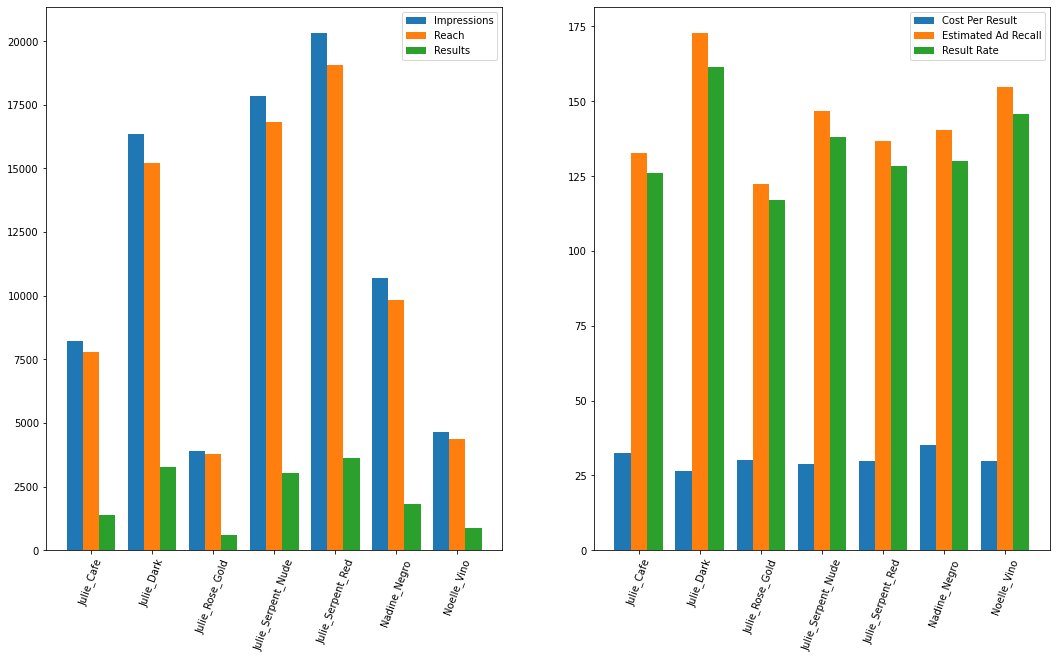

In [161]:
# Quiero comparar cada modelo entre sus Impression - Results
plt.figure(figsize = (18, 10))

# Contador de valores
product_cont = 0 

# Lista de productos
product_list = []

# Valores en y
y_impression = []
y_reach = []
y_results = []

# Agregar valores x - y 
for name, df_temp in df_may_group:
    # Obtener valores de impressions
    # Obtener valores de reach
    # Obtener valores de resultados
    y_impression.append(df_temp["Impressions"].sum())
    y_reach.append(df_temp["Reach"].sum())
    y_results.append(df_temp["Results"].sum())

    # Valores en x
    product_list.append(name)

    x_positions_1 = [3 * index + (0.8 * 1) for index in range(7)]
    x_positions_2 = [3 * index + (0.8 * 2) for index in range(7)]
    x_positions_3 = [3 * index + (0.8 * 3) for index in range(7)]
    

# Plot de tres variables
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x = x_positions_1, height = y_impression, label = "Impressions")
ax1.bar(x = x_positions_2, height = y_reach, label = "Reach")
ax1.bar(x = x_positions_3, height = y_results, label = "Results")

x_labels = [a + (b - a) / 2 for a, b in zip(x_positions_1, x_positions_3)]
plt.xticks(ticks = x_labels, labels  = product_list, rotation = 70)

plt.legend()

# Medir eficiencia por producto - costo por resultado - tasa resultado
x_cost_per_result = []
x_estimated_ad_recall = []
x_result_rate = []

for name, df_temp in df_may_group:

    x_cost_per_result.append(df_temp["Cost per results"].sum())
    x_estimated_ad_recall.append(df_temp["Estimated ad recall lift rate"].sum())
    x_result_rate.append(df_temp["Result rate"].sum())

x_cost_per_result = [x * 100 for x in x_cost_per_result]

ax2 = plt.subplot(1, 2, 2)
ax2.bar(x = x_positions_1, height = x_cost_per_result, label = "Cost Per Result")
ax2.bar(x = x_positions_2, height = x_estimated_ad_recall, label = "Estimated Ad Recall")
ax2.bar(x = x_positions_3, height = x_result_rate, label = "Result Rate")

plt.xticks(ticks =  x_labels, labels = product_list, rotation = 70)

plt.legend()
plt.show()

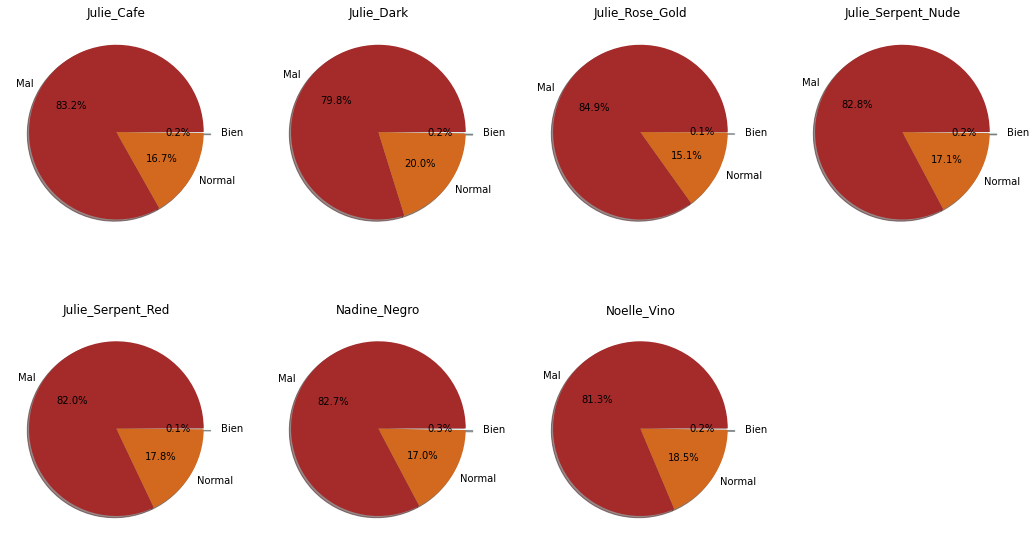

In [162]:
plt.figure(figsize = (18, 10))

i = 1

for name, df_temp in df_may_group:

    impresiones = df_temp["Impressions"].sum()
    recuerdo = df_temp["Results"].sum()
    link_clicks = df_temp["Link clicks"].sum()
    no_recuerdo = df_temp["Impressions"].sum() - df_temp["Results"].sum()

    ax1 = plt.subplot(2, 4, i)
    ax1.pie([no_recuerdo, recuerdo, link_clicks], labels = ["Mal", "Normal", "Bien"], shadow = True, explode = [0, 0, 0.1], autopct = "%1.1f%%", colors = ["brown", "chocolate", "azure"])
    ax1.set_title(name)

    i += 1


plt.show()

0.5029297089814847


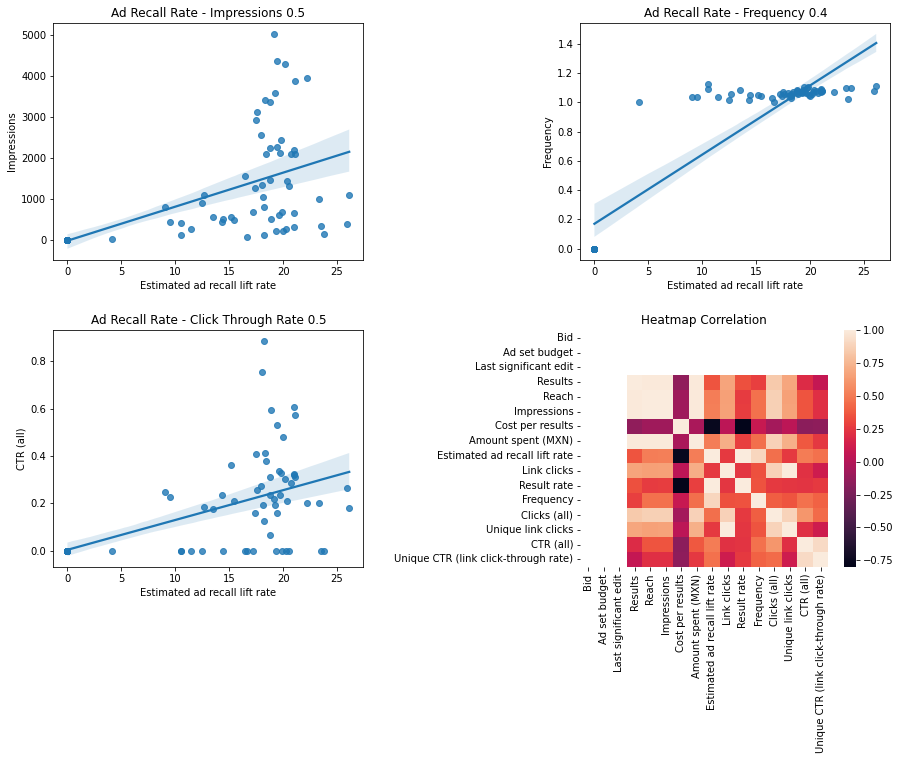

In [163]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax1 = sns.regplot(data = df_may, x = "Estimated ad recall lift rate", y = "Impressions", ax = axes[0][0])
corr, _ = pearsonr(df_may["Estimated ad recall lift rate"], df_may["Impressions"])
ax1.set_title("Ad Recall Rate - Impressions " + str(corr)[:3])

ax2 = sns.regplot(data = df_may, x = "Estimated ad recall lift rate", y = "Frequency", ax = axes[0][1])
df_temp = df_may[df_may["Frequency"] >= 1]
corr, _ = pearsonr(df_temp["Estimated ad recall lift rate"], df_temp["Frequency"])
ax2.set_title("Ad Recall Rate - Frequency " + str(corr)[:3])

ax3 = sns.regplot(data = df_may, x = "Estimated ad recall lift rate", y = "CTR (all)", ax = axes[1][0])
corr, _ = pearsonr(df_may["Estimated ad recall lift rate"], df_may["CTR (all)"])
print(corr)
ax3.set_title("Ad Recall Rate - Click Through Rate " + str(corr)[:3])

ax4 = sns.heatmap(df_may.corr())
ax4.set_title("Heatmap Correlation")

plt.subplots_adjust(wspace = 0.7)
plt.subplots_adjust(hspace = 0.3)
plt.show()

In [164]:
def quality_fill(x):
    if x["Ad name"] == "Julie_Serpent_Nude":
        x["Quality ranking"] = "Average"
        return x

    elif x["Ad name"] == "Julie_Cafe":
        x["Quality ranking"] = "Average"
        return x

    elif x["Ad name"] == "Nadine_Negro":
        x["Quality ranking"] = "Below average - Bottom 35 of ads"
        return x
    
    elif x["Ad name"] == "Julie_Dark":
        x["Quality ranking"] = "Below average - Bottom 35 of ads"
        return x

    elif x["Ad name"] == "Julie_Serpent_Red":
        x["Quality ranking"] = "Below average - Bottom 35 of ads"
        return x
    
    elif x["Ad name"] == "Noelle_Vino":
        x["Quality ranking"] = "Average"
        return x
    
    elif x["Ad name"] == "Julie_Rose_Gold":
        x["Quality ranking"] = "Average"
        return x
    

df_may = df_may.apply(quality_fill, axis = 1)

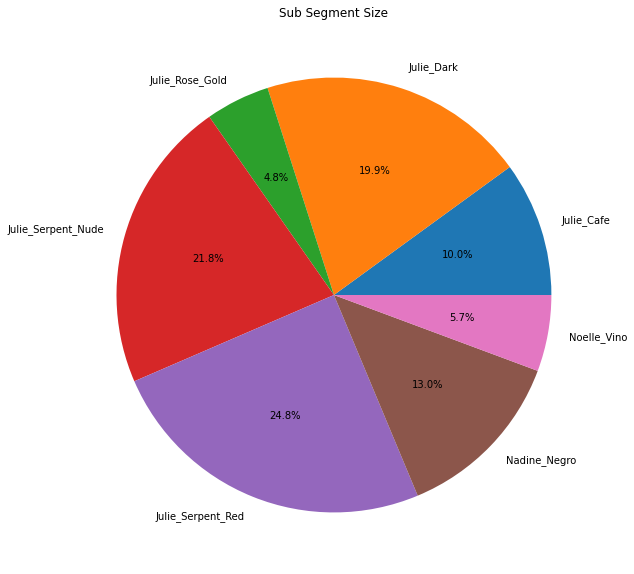

In [165]:
# Obtener tamano de subsegmentos 
df_pie = df_may.groupby("Ad name").Impressions.sum().reset_index()
x_values = df_pie["Impressions"]
y_labels = df_pie["Ad name"]

plt.figure(figsize = (15, 10))
plt.pie(x = x_values, labels = y_labels, autopct = "%.1f%%")
plt.title("Sub Segment Size")
plt.show()

In [166]:
# Analisis por edad
df_age = pd.read_csv("albana_ad-Ads-May-1-2022-May-10-2022_age.csv")

In [167]:
df_age.head()

,Ad name,Age,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,Attribution setting,...,Estimated ad recall lift rate,Link clicks,Result rate,Frequency,Clicks (all),Reporting starts,Reporting ends,Unique link clicks,CTR (all),Unique CTR (link click-through rate)
0,Julie_Dark,55-64,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,22.500000,NaN,15.652174,1.437500,0,2022-05-01,2022-05-10,NaN,0.000000,0.000000
1,Julie_Dark,45-54,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,22.091503,21.0,17.576703,1.256863,27,2022-05-01,2022-05-10,19.0,0.280811,0.248366
2,Julie_Serpent_Nude,55-64,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,21.428571,1.0,16.574586,1.292857,2,2022-05-01,2022-05-10,1.0,0.368324,0.238095
3,Julie_Serpent_Red,55-64,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,20.967742,2.0,13.698630,1.530645,5,2022-05-01,2022-05-10,2.0,0.526870,0.322581
4,Julie_Dark,35-44,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,20.420185,16.0,16.747182,1.219321,20,2022-05-01,2022-05-10,16.0,0.322061,0.314157


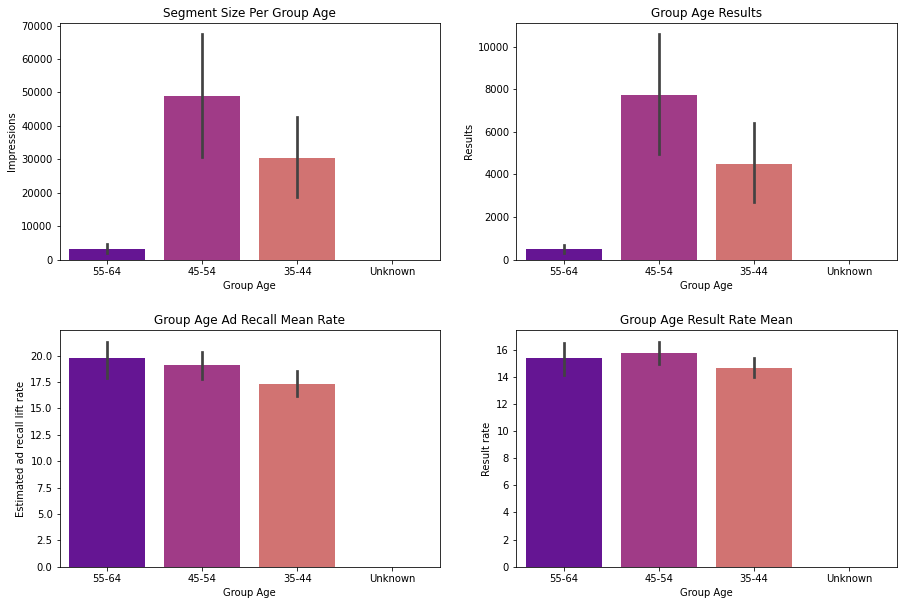

In [168]:
# Edades en general con mas impresiones
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax1 = sns.barplot(data = df_age, x = "Age", y = "Impressions", ax = axes[0][0], estimator = sum, palette = "plasma")
ax1.set_title("Segment Size Per Group Age")
ax1.set_xlabel("Group Age")

ax2 = sns.barplot(data = df_age, x = "Age", y = "Results", ax = axes[0][1], estimator = sum, palette = "plasma")
ax2.set_title("Group Age Results")
ax2.set_xlabel("Group Age")

ax3 = sns.barplot(data = df_age, x = "Age", y = "Estimated ad recall lift rate", ax = axes[1][0], palette = "plasma")
ax3.set_xlabel("Group Age")
ax3.set_title("Group Age Ad Recall Mean Rate")

ax4 = sns.barplot(data = df_age, x = "Age", y = "Result rate", ax = axes[1][1], palette = "plasma")
ax4.set_xlabel("Group Age")
ax4.set_title("Group Age Result Rate Mean")


plt.subplots_adjust(hspace=0.3)
plt.show()

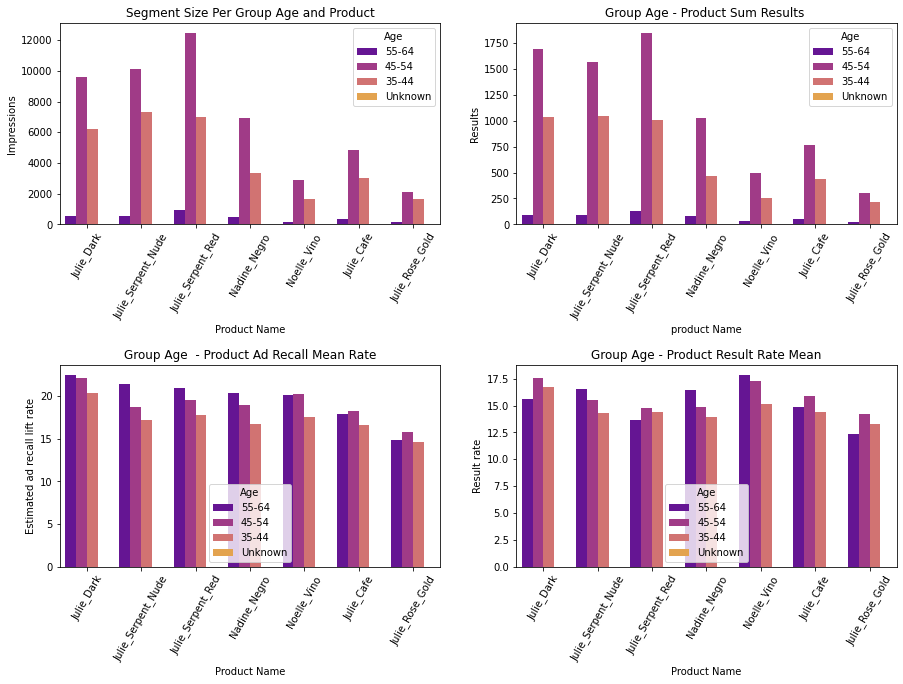

In [169]:
# Segmentar por edad y producto 
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax1 = sns.barplot(data = df_age, x = "Ad name", y = "Impressions", hue = "Age", ax = axes[0][0], estimator = sum, palette = "plasma")
ax1.set_xticklabels(labels = df_age["Ad name"].unique(), rotation = 60)
ax1.set_title("Segment Size Per Group Age and Product")
ax1.set_xlabel("Product Name")

ax2 = sns.barplot(data = df_age, x = "Ad name", y = "Results", hue = "Age", ax = axes[0][1], estimator = sum, palette = "plasma")
ax2.set_xticklabels(labels = df_age["Ad name"].unique(), rotation = 60)
ax2.set_title("Group Age - Product Sum Results ")
ax2.set_xlabel("product Name")

ax3 = sns.barplot(data = df_age, x = "Ad name", y = "Estimated ad recall lift rate", hue = "Age", ax = axes[1][0], palette = "plasma")
ax3.set_xticklabels(labels = df_age["Ad name"].unique(), rotation = 60)
ax3.set_xlabel("Product Name")
ax3.set_title("Group Age  - Product Ad Recall Mean Rate")

ax4 = sns.barplot(data = df_age, x = "Ad name", y = "Result rate", hue = "Age", ax = axes[1][1], palette = "plasma")
ax4.set_xticklabels(labels = df_age["Ad name"].unique(), rotation = 60)
ax4.set_xlabel("Product Name")
ax4.set_title("Group Age - Product Result Rate Mean")

plt.subplots_adjust(hspace=0.7)
plt.show()


In [170]:
# Segmentar por ubicacion
df_region = pd.read_csv("albana_ad-Ads-May-1-2022-May-10-2022_region.csv")

In [171]:
df_region.head()

,Ad name,Region,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,Attribution setting,...,Estimated ad recall lift rate,Link clicks,Result rate,Frequency,Clicks (all),Reporting starts,Reporting ends,Unique link clicks,CTR (all),Unique CTR (link click-through rate)
0,Nadine_Negro,Unknown,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,100.000000,NaN,100.000000,1.000000,0,2022-05-01,2022-05-10,NaN,0.0,0.0
1,Nadine_Negro,California,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,35.714286,NaN,27.027027,1.321429,0,2022-05-01,2022-05-10,NaN,0.0,0.0
2,Julie_Rose_Gold,Unknown,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,33.333333,NaN,33.333333,1.000000,0,2022-05-01,2022-05-10,NaN,0.0,0.0
3,Julie_Cafe,California,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,29.411765,NaN,28.571429,1.029412,0,2022-05-01,2022-05-10,NaN,0.0,0.0
4,Nadine_Negro,Michoacán de Ocampo,active,"Ejecutiva(C, C+)",0,ABSOLUTE_OCPM,100,Daily,0,7-day click or 1-day view,...,25.000000,NaN,12.500000,2.000000,0,2022-05-01,2022-05-10,NaN,0.0,0.0


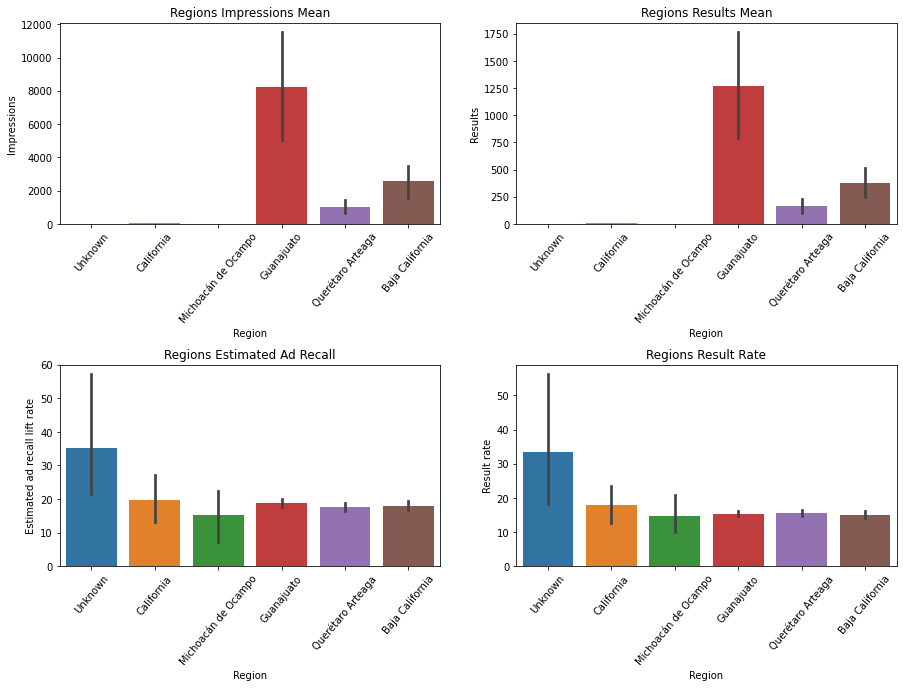

In [192]:
# Ubicar estados con mas eficiencia e impacto 
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax1 = sns.barplot(data = df_region, x = "Region", y = "Impressions", ax = axes[0][0])
ax1.set_xticklabels(labels = df_region["Region"].unique(), rotation = 50)
ax1.set_title("Regions Impressions Mean")

ax2 = sns.barplot(data = df_region, x = "Region", y = "Results", ax = axes[0][1])
ax2.set_xticklabels(labels = df_region["Region"].unique(), rotation = 50)
ax2.set_title("Regions Results Mean")

ax3 = sns.barplot(data = df_region, x = "Region", y = "Estimated ad recall lift rate", ax = axes[1][0])
ax3.set_xticklabels(labels = df_region["Region"].unique(), rotation = 50)
ax3.set_title("Regions Estimated Ad Recall")

ax4 = sns.barplot(data = df_region, x = "Region", y = "Result rate", ax = axes[1][1])
ax4.set_xticklabels(labels = df_region["Region"].unique(), rotation = 50)
ax4.set_title("Regions Result Rate")

plt.subplots_adjust(hspace=0.7)
plt.show()

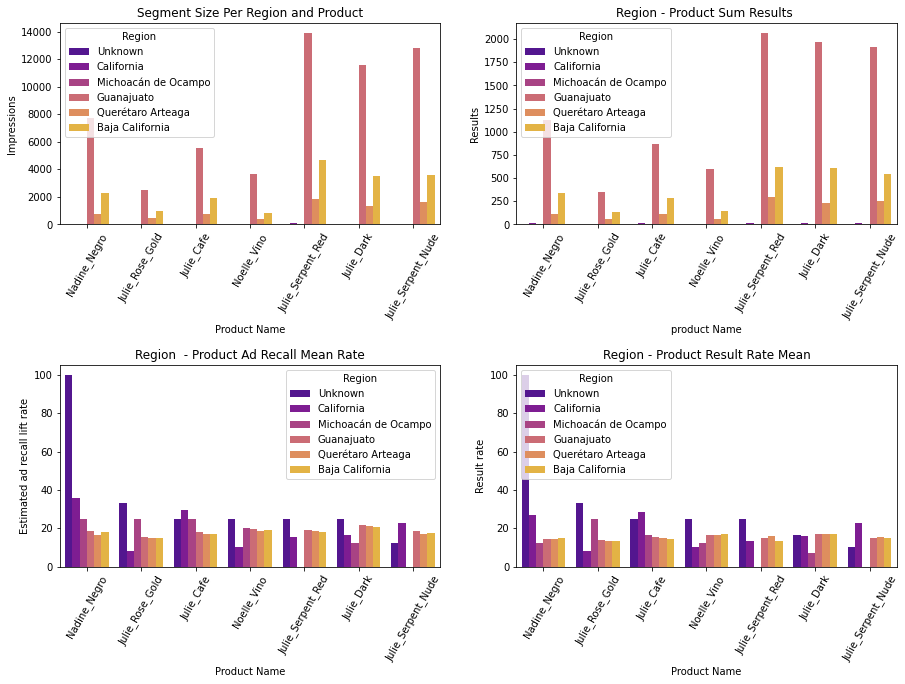

In [197]:
# Ubicar regiones y sus bolsos favoritos 
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax1 = sns.barplot(data = df_region, x = "Ad name", y = "Impressions", hue = "Region", ax = axes[0][0], palette = "plasma", estimator = np.mean)
ax1.set_xticklabels(labels = df_region["Ad name"].unique(), rotation = 60)
ax1.set_title("Segment Size Per Region and Product")
ax1.set_xlabel("Product Name")

ax2 = sns.barplot(data = df_region, x = "Ad name", y = "Results", hue = "Region", ax = axes[0][1], palette = "plasma")
ax2.set_xticklabels(labels = df_region["Ad name"].unique(), rotation = 60)
ax2.set_title("Region - Product Sum Results ")
ax2.set_xlabel("product Name")

ax3 = sns.barplot(data = df_region, x = "Ad name", y = "Estimated ad recall lift rate", hue = "Region", ax = axes[1][0], palette = "plasma")
ax3.set_xticklabels(labels = df_region["Ad name"].unique(), rotation = 60)
ax3.set_xlabel("Product Name")
ax3.set_title("Region  - Product Ad Recall Mean Rate")

ax4 = sns.barplot(data = df_region, x = "Ad name", y = "Result rate", hue = "Region", ax = axes[1][1], palette = "plasma")
ax4.set_xticklabels(labels = df_region["Ad name"].unique(), rotation = 60)
ax4.set_xlabel("Product Name")
ax4.set_title("Region - Product Result Rate Mean")

plt.subplots_adjust(hspace=0.7)
plt.show()